In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from os.path import exists, join
import seaborn as sns
import dask
import xarray as xr
import admix

import matplotlib
matplotlib.rcParams['figure.dpi'] = 150

In [3]:
rls_list = []
for n_indiv in [5000, 10000, 20000]:
    for anc_prop in [0.5, 0.2]:
        for cor in [0.5, 0.8, 1.0]:
            df_tmp = pd.read_csv(f"../01_simulate/out/estimate/n_indiv_{n_indiv}_anc_prop_{anc_prop}/cor_{cor}/HE.tsv.gz", sep='\t')
            df_tmp["n_indiv"] = n_indiv
            df_tmp["anc_prop"] = anc_prop
            df_tmp["cor"] = cor
            rls_list.append(df_tmp)
df_plot = pd.concat(rls_list)

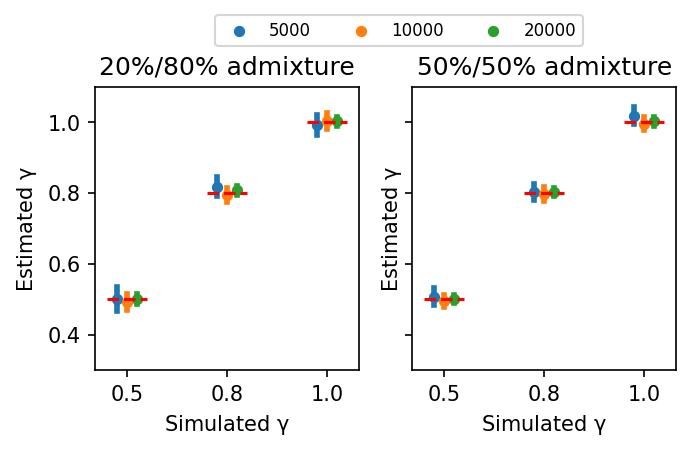

In [24]:
fig, ax = plt.subplots(figsize=(5, 2.5), dpi=150, ncols=2, sharex=True, sharey=True)
sns.pointplot(data=df_plot[df_plot.anc_prop == 0.2], x = "cor", y="A2", hue="n_indiv", dodge=0.2, join=False, ax=ax[0], markers='.')
sns.pointplot(data=df_plot[df_plot.anc_prop == 0.5], x = "cor", y="A2", hue="n_indiv", dodge=0.2, join=False, ax=ax[1], markers='.')

list_gamma = df_plot.cor.unique()
plt.xlabel("Simulated $\gamma$")
plt.ylabel("Estimated $\gamma$")

for ax_i in range(len(ax)):
    ax[ax_i].hlines(list_gamma, np.arange(len(list_gamma)) - 0.2, np.arange(len(list_gamma)) + 0.2, color="red", ls='--', zorder=10)
    ax[ax_i].set_ylim(0.3, 1.1)
    ax[ax_i].set_xlabel("Simulated $\gamma$")
    ax[ax_i].set_ylabel("Estimated $\gamma$")

ax[0].set_title("20%/80% admixture")
ax[1].set_title("50%/50% admixture")

ax[0].legend(fontsize=8, loc="center", bbox_to_anchor=[1.15, 1.20], ncol=3)
ax[1].legend().set_visible(False)
plt.savefig("estimate.pdf", dpi=150, bbox_inches='tight')